In [1]:
import pandas as pd
from tkinter import *

In [2]:
#load data
data = pd.read_csv('data_clean.csv',encoding='latin1')
data.head()

,Tweet,Affect Dimension,Tweet_lema
0,we need to do something. something must be don...,0,need something something must doneyour anxiety...
1,@Chan_lfc10 @paul_rule @Nuttall1878 @DeadlineD...,0,would fume hijacked 8m move relegate full back
2,Caleb had a nightmare about zombies.,0,caleb nightmare zombies
3,#CNN really needs to get out of the #Propagand...,0,cnn really need propaganda business 30 second ...
4,#dmme #kikme #sext #horny #ass #bbw #naught...,0,dmme kikme sext horny bbw naughty pussy kik nu...


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

Tfidf=TfidfVectorizer()
X= data['Tweet_lema']
y=data['Affect Dimension']

#x=Tfidf.fit_transform(X)
X = Tfidf.fit_transform(X.values.astype('U'))

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [8]:

svc = svm.SVC(C=1, degree= 1, gamma= 1, kernel= 'poly', probability= True).fit(X_train,y_train)
pred_2= svc.predict(X_test)
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       402
           1       0.69      0.68      0.68       428
           2       0.89      0.83      0.86       399
           3       0.56      0.65      0.60       361

    accuracy                           0.71      1590
   macro avg       0.72      0.71      0.71      1590
weighted avg       0.72      0.71      0.71      1590



   =      1
0  =   0.18
1  =  97.83
2  =   0.34
3  =   1.65
0= anger, 1=fear, 2=joy, 3=sadness


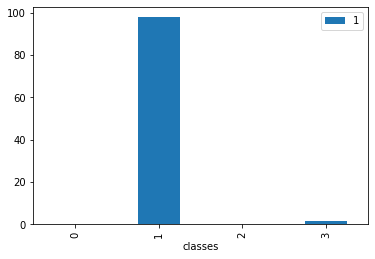

In [198]:
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import numpy as np
text="i am afraid"
data=sent_tokenize(text)
data
abc=Tfidf.transform(data)
pred1= svc.predict(abc)
probab=svc.predict_proba(abc)
classes=svc.classes_
#print(np.array(probab))
for class_name,probab in zip(classes,probab):
    f"{class_name}: {probab}"
d=pd.DataFrame(probab*100,columns=pred1).apply(lambda x:round(x,2))
d["classes"]=classes

d.insert(0, '=', ['=','=','=','='])
a=(d[['=',int(pred1)]])
print(a)

print("0= anger, 1=fear, 2=joy, 3=sadness")
fig=d.plot(kind="bar",x='classes',y=pred1 )
fig.figure.savefig('test.png')

In [199]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
from time import sleep
import pandas as pd


#consumer key, consumer secret, access token, access secret.
ckey="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
csecret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
atoken="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
asecret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

auth = tweepy.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken,asecret)
api = tweepy.API(auth)

searchTerm = input("enter hashtag for search: ")
no_searchTerms = int(input("enter number of tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="en").items(no_searchTerms)

tweet_list=[tweet for tweet in tweets]
noTweet=0
text=[]
for tweet in tweet_list:
    text.append(tweet.text)
   
text

df= pd.DataFrame(text)
df.columns=['Tweet']
df

enter hashtag for search: #christmas
enter number of tweets to analyze: 5


,Tweet
0,RT @HiIreland: A wintry post #Christmas mornin...
1,"1st February 2021, 327 days to go! For all the..."
2,RT @KatieMettner: Allison was a college senior...
3,"RT @MSalmanButt_03: ""Those we love never truly..."
4,RT @NicolaYeager: Mary Schmidt's lovely review...


In [200]:
#cleaning text
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
import string
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()



def CleanTxt(text):
    #text= str(text).lower() #lowercase
    text= re.sub(r'@[A-Za-z0-9\:]+','',text)
    text= re.sub(r'\_[A-Za-z0-9]+','',text) #remove mentions
    text= re.sub(r'#','',text) #remove hashtag
    text= re.sub(r'RT','',text) #remove hashtag
    text= re.sub(r'http\S+|www\.\S+','',text) #remove hyperlinks 
    text = re.sub("(.)\\1{2,}", "\\1", text)
    
    text= text.translate(str.maketrans('','',string.punctuation)) #remove punctuations
   
    
    return text

df['Tweet_clean']= df['Tweet'].apply(CleanTxt)

df.head()

,Tweet,Tweet_clean
0,RT @HiIreland: A wintry post #Christmas mornin...,A wintry post Christmas morning down in Wick...
1,"1st February 2021, 327 days to go! For all the...",1st February 2021 327 days to go For all the l...
2,RT @KatieMettner: Allison was a college senior...,Allison was a college senior ready to gradua...
3,"RT @MSalmanButt_03: ""Those we love never truly...",Those we love never truly leave us There are...
4,RT @NicolaYeager: Mary Schmidt's lovely review...,Mary Schmidts lovely review of A Recipe for ...


In [195]:
def to_emo(pred):
    switcher={
        0: "Angry",
        1: "Fear  ",
        2: "Joy   ",
        3: "Sad   ",
        }
    
    return switcher.get(pred,"nothing")
    
list1=[]
emotion=[]
for tweet in df['Tweet_clean']:
    list1.append(tweet)
    
s=no_searchTerms
for n in range(s) :
    #print (list1[n])
    data1=list1[n]
    data=sent_tokenize(data1)
    abc=Tfidf.transform(data)
    pred12= int(svc.predict(abc))
    #print(pred12)
    emotion.append(to_emo(pred12))
    
    
#print(emotion)
#print(list1)
data_tuples = list(zip(text,emotion))
data_tuples
Tweet_anatysis=pd.DataFrame(data_tuples, columns=['Tweet','emotion'])

Tweet_anatysis.to_csv('./Tweet_anatysis.csv', index=False)
Tweet_anatysis.head()


,Tweet,emotion
0,RT @GINIQGIN: #Whisky #Whiskey #Malt #Gin #Oxf...,Angry
1,Gluten free Chocolate Fudge Cake baked for a s...,Joy
2,RT @Club_DanceRadio: play music https://t.co/g...,Joy
3,RT @blazing_night: Christmas party Frank pins ...,Fear
4,RT @Club_DanceRadio: play music https://t.co/g...,Joy


# Creating GUI

In [204]:
from tkinter import *
import tkinter as tk
from nltk.tokenize import sent_tokenize
from sklearn import svm
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import string
from nltk.corpus import stopwords
import csv
import tkinter.ttk as ttk
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
from PIL import ImageTk,Image
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

win=Tk()
win.geometry("900x650")
win.title("Emotion Classifier")
win.configure(background="light blue")
win.resizable(0,0)
canvas=Canvas(win)
canvas.create_line(300, 35, 300, 200, dash=(4, 2))
frame1 = Frame(win,background="light blue")
frame1.place(y=390,x=100,height=240, width=370)
#frame2 = Frame(win,background="light blue")
#frame2.place(x=490, y=140,height=150, width=300)

fr = Frame(win,background="light blue", relief="solid")

label_head=Label(win,text="Emotion Classifier",width="300",height="2",font=("Calibri 20 bold underline"), bg='#3d9bb8').pack()
#----------Labels
text_1=Label(win,text="Enter text: ", font=("Calibri 12"),background="light blue", relief=RIDGE).place(x=40, y=100)
#Button(win, text= "Enter", font=("Calibri 12")).place(x=370, y=97)

text_Prediction=Label(win,text="Predicted emotion:  ", font=("Calibri 12"),bg="light blue", relief=RIDGE).place(x=40, y=150)

#----------Extry of string text
Enter_text=StringVar() 
Entry(win, text=Enter_text ,width=30).place(x=170, y=105)

def to_emo(pred):
    switcher={
        0: "Angry",
        1: "Fear  ",
        2: "Joy   ",
        3: "Sad   ",
        }
    
    return switcher.get(pred,"nothing")

#--------------graph and percentage
   
def graph():
    try:
        
        
        data=sent_tokenize(Enter_text.get())
        abc=Tfidf.transform(data)
        pred1= svc.predict(abc)
        probab=svc.predict_proba(abc)
        classes=svc.classes_
        #print(np.array(probab))
        for class_name,probab in zip(classes,probab):
            f"{class_name}: {probab}"
        d=pd.DataFrame(probab*100,columns=pred1).apply(lambda x:round(x,2))
        d["classes"]=classes
    
        #d.set_index('classes')
        d.insert(0, '=', ['=','=','=','='])
        a=(d[['=',int(pred1)]])

        #print(d.head())
        #fr = Frame(win,background="blue", relief="solid")
        #fr.place(x=480, y=135,height=450, width=390)
        label_percent=Label(win,text=a,font=("Calibri 11"),background='#b7e3f7',width=12, relief='solid').place(x=718, y=448)
        l=Label(win,text="Emotion:", font=("Calibri 11"),background='#b7e3f7').place(x=720, y=450)
        Label(win,text="Key: 0= anger, 1=fear, 2=joy, 3=sadness", font=("Calibri 12"),background="light blue").place(x=510, y=545)


    
        figure = plt.Figure(figsize=(6,5), dpi=60)
        ax = figure.add_subplot(111)
        chart_type = FigureCanvasTkAgg(figure, win)
        chart_type.get_tk_widget().place(x=490, y=140)
        #df = d[['classes',pred1]].groupby(pred1).sum()
        d.plot(kind='bar', x='classes',y=pred1, legend=True, ax=ax)
        #d.plot(kind="bar",x='classes',y=pred1 )
        ax.set_title('Emotion Confidence graph')
        #elif len(Enter_text.get())== 0 :
        #Label(win,text='--- Text not entered ---', font=("Calibri 12"),background="light blue", fg='red').place(x=180, y=150)
    except:
        fr.place(x=480, y=135,height=450, width=390)
        Label(win,text='--- Text not entered --- \n Enter one sentence only', font=("Calibri 12"),background="light blue", fg='red').place(x=500, y=150)
   
        

    return None


#------------prediction function
def result():
    try:
    #if len(Enter_text.get())>0:
        Label(win,text='                                                 \n                                                       ',background="light blue",).place(x=180, y=150)
        #data= data.translate(str.maketrans('','',string.punctuation)) #remove punctuations
        data=sent_tokenize(Enter_text.get())
        
        abc=Tfidf.transform(data)
        pred= int(svc.predict(abc))
        frame2 = Frame(win,background="light blue")
        frame2.place(x=480, y=135,height=450, width=390)
        
    

        Label(win,text=str(to_emo(pred)), font=("Calibri 12"),background="light blue").place(x=180, y=150)
    except:
    #elif len(Enter_text.get())== 0 :
        Label(win,text='--- Text not entered --- \n Enter one sentence only', font=("Calibri 12"),background="light blue", fg='red').place(x=180, y=145)
        frame2 = Frame(win,background="light blue")
        frame2.place(x=480, y=135,height=450, width=390)

    
Button(win, text= "Enter", font=("Calibri 12 "),background="grey", fg="white", command=result).place(x=368, y=97)
Button(win, text= "graph", font=("Calibri 12 "),background="grey", fg="white", command=graph).place(x=417, y=97)
#Label(win,text="Key:   0= anger, 1=fear, 2=joy, 3=sadness", font=("Calibri 12"),background="light blue", relief=RIDGE).place(x=510, y=100)

#for tweets
label_tweet=Label(win,text="Emotion Classifier for live streaming tweets",font=("Calibri 18 bold"),background='#3d9bb8', relief='solid').place(x=30, y=190)
#--------------Labels
Label(win,text="Enter Hashtag: ", font=("Calibri 12"),background="light blue", relief=RIDGE).place(x=40, y=240)
Label(win,text="Enter no. of tweets: ",background="light blue", font=("Calibri 12"), relief=RIDGE).place(x=40, y=270)

#---------------Entry
Enter_hashtag=StringVar() 
Enter_number=StringVar()
Entry(win, text=Enter_hashtag ,width=30).place(x=200, y=240)
Entry(win, text=Enter_number ,width=30).place(x=200, y=270)

#def vali():
 #   if()
def to_emo(pred):
    switcher={
        0: "Angry",
        1: "Fear  ",
        2: "Joy   ",
        3: "Sad   ",
        }
    
    return switcher.get(pred,"nothing")
# function for extraction of tweets
def extract():
    try:
        Label(win,text='                                           ', font=("Calibri 12"),background="light blue", fg='red').place(x=180, y=305)
    
        clear_data()
        #consumer key, consumer secret, access token, access secret.
        ckey="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
        csecret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
        atoken="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
        asecret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

        auth = tweepy.OAuthHandler(ckey, csecret)
        auth.set_access_token(atoken,asecret)
        api = tweepy.API(auth)
        hashtag=Enter_hashtag.get()
        number= int(Enter_number.get())

        tweets = tweepy.Cursor(api.search, q=hashtag, lang="en").items(number)

        tweet_list=[tweet for tweet in tweets]
        noTweet=0
        text=[]
        for tweet in tweet_list:
            text.append(tweet.text)
   
    #print(text)

        df= pd.DataFrame(text)
        df.columns=['Tweet']
        lemmatizer = WordNetLemmatizer()



        def CleanTxt(text):
    #text= str(text).lower() #lowercase
            text= re.sub(r'@[A-Za-z0-9\:]+','',text)
            text= re.sub(r'\_[A-Za-z0-9]+','',text) #remove mentions
            text= re.sub(r'#','',text) #remove hashtag
            text= re.sub(r'RT','',text) #remove hashtag
            text= re.sub(r'http\S+|www\.\S+','',text) #remove hyperlinks 
            text = re.sub("(.)\\1{2,}", "\\1", text)
    
            text= text.translate(str.maketrans('','',string.punctuation)) #remove punctuations
   
    
            return text

        df['Tweet_clean']= df['Tweet'].apply(CleanTxt)

        df.head()

    
        list1=[]
        emotion=[]
        for tweet in df['Tweet_clean']:
            list1.append(tweet)
    
    #s=no_searchTerms
        for n in range(number) :
    #print (list1[n])
            data1=list1[n]
            data=sent_tokenize(data1)
            abc=Tfidf.transform(data)
            pred12= int(svc.predict(abc))

            emotion.append(to_emo(pred12))
    


        data_tuples = list(zip(text,emotion))
        data_tuples
        Tweet_anatysis=pd.DataFrame(data_tuples, columns=['Tweet','emotion'])

        Tweet_anatysis.to_csv('./Tweet_anatysis.csv', index=False)

        file_path = './Tweet_anatysis.csv'
        df = pd.read_csv(file_path)
        tv1["column"] = list(df.columns)
        tv1["show"] = "headings"
        for column in tv1["columns"]:
            tv1.heading(column, text=column) #column heading = column name

        df_rows = df.to_numpy().tolist() 
        for row in df_rows:
            tv1.insert("", "end", values=row) 
    except:
        Label(win,text='--- Text not entered ---', font=("Calibri 12"),background="light blue", fg='red').place(x=180, y=305)
    
    return None
    #Tweet_a.head()
        

    
    

def clear_data():
    tv1.delete(*tv1.get_children())
    return None

# Treeview Widget
tv1 = ttk.Treeview(frame1)
tv1.place(relheight=1, relwidth=1) 

treescrolly = Scrollbar(frame1, orient="vertical", command=tv1.yview) # command means update the yaxis 
treescrollx = Scrollbar(frame1, orient="horizontal", command=tv1.xview) # command to update the xaxis 
tv1.configure(xscrollcommand=treescrollx.set, yscrollcommand=treescrolly.set) # scrollbars 
treescrolly.pack(side="right", fill="y") # make the scrollbar fill the y axis of the Treeview widget
treescrollx.pack(side="bottom", fill="x") # make the scrollbar fill the x axis of the Treeview widget



    
B_1= Button(win, text= "Enter", font=("Calibri 12"), background="grey", fg="white",command=extract).place(x=370, y=305)

Label(win,text="Predicted emotion:  ", font=("Calibri 12"),background="light blue",relief=RIDGE).place(x=40, y=350)



Button(win, text= "Exit", font=("Calibri 12 bold"),background="grey", fg="white",width=12, command=win.destroy).place(x=730, y=600)



win.mainloop()
